In [ ]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data loading

In [ ]:
dataset = pd.read_csv("/content/HR DATA.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: xlabel='Attrition', ylabel='count'>

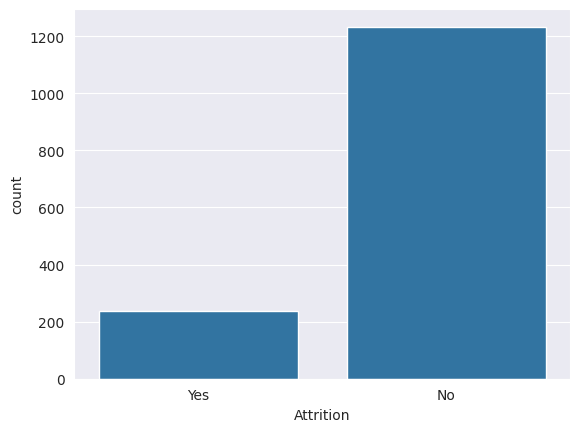

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
              data = dataset)

In [ ]:
###DATA VISULIZATION

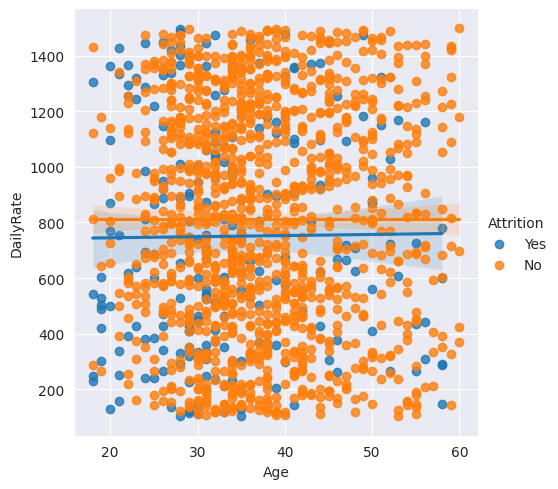

In [ ]:
sns.lmplot(x = 'Age',
           y = 'DailyRate',
           hue = 'Attrition',
           data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

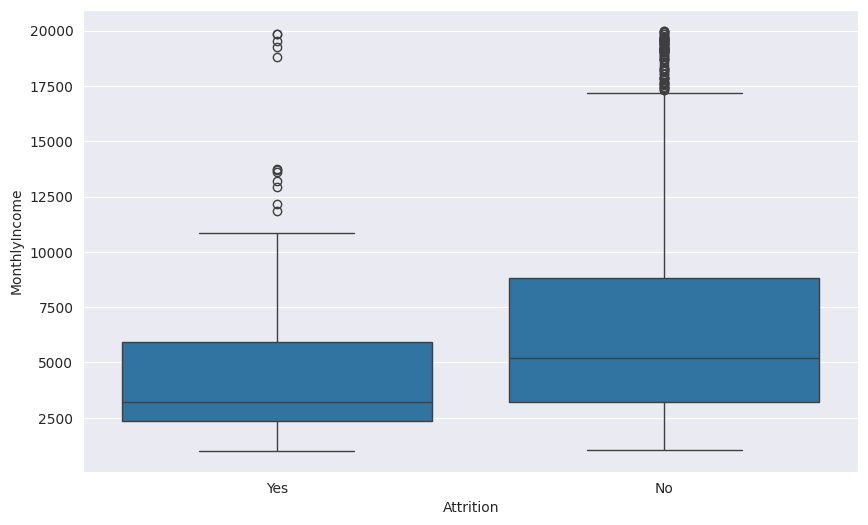

In [ ]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',
            x ='Attrition',
            data = dataset)

DATA PREPROCESSING

In [ ]:
#DATA PREPROCESSING

In [ ]:
dataset.drop('EmployeeCount',
             axis = 1,
             inplace = True)
dataset.drop('StandardHours',
             axis = 1,
             inplace = True)
dataset.drop('EmployeeNumber',
             axis = 1,
             inplace = True)
dataset.drop('Over18',
             axis = 1,
             inplace = True)

print(dataset.shape)

(1470, 31)


In [ ]:
y = dataset.iloc[:, 1]
X = dataset

X.drop('Attrition',
       axis = 1,
       inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
                                    prefix ='BusinessTravel')

dum_Department = pd.get_dummies(dataset['Department'],
                                prefix ='Department')

dum_EducationField = pd.get_dummies(dataset['EducationField'],
                                   prefix ='EducationField')

dum_Gender = pd.get_dummies(dataset['Gender'],
                           prefix ='Gender', drop_first = True)

dum_JobRole = pd.get_dummies(dataset['JobRole'],

                            prefix ='JobRole')

dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],

                                  prefix ='MaritalStatus')

dum_OverTime = pd.get_dummies(dataset['OverTime'],
                             prefix ='OverTime', drop_first = True)

# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
              dum_EducationField, dum_Gender, dum_JobRole,
              dum_MaritalStatus, dum_OverTime], axis = 1)

# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
       axis = 1, inplace = True)

print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


Splitting data to training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

   X, y, test_size = 0.25, random_state = 40)

Model Building

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):

    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))

        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')

        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")

    elif train == False:

        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))

        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))

        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))

        print("-----------------------------------------------------------")

print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)

print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       922
           1       1.00      0.89      0.94       180

    accuracy                           0.98      1102
   macro avg       0.99      0.94      0.97      1102
weighted avg       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 20 160]]

Average Accuracy: 	 0.8376
Accuracy SD: 		 0.0147
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       311
           1       0.80      0.21      0.33        57

    accuracy                           0.87       368
   macro avg       0.84      0.60      0.63       368
weighted avg       0.86      0.87      0.84       368


Confusion Matrix: 
 [[308   3]
 [ 45  12]]

accuracy score: 0.8696

---------------------

HYPER PARAMETER TUNNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=40)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy', # You can change the scoring metric if needed
    n_jobs=-1, # Use all available cores
    verbose=2
)

# Fit GridSearchCV on train data
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best accuracy score on CV:")
print(grid_search.best_score_)

# To use the best model for predictions:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Best accuracy score on CV:
0.8538831756478815


In [ ]:
import joblib

# Save the best trained model from GridSearchCV
joblib.dump(best_rf, 'rf_model.joblib')

# To load the model later:
# loaded_model = joblib.load('rf_model.joblib')


['rf_model.joblib']